In [93]:
import numpy as np
import matplotlib.pyplot as plt
from functools import singledispatch

# Fuzzy論理

In [94]:
class Fuzzy:
    def __init__(self, name, grade):
        self._name = name
        self._grade = grade
        self._origin = 1 # fuzzy集合の最小添え字
        
    @property # デコレータ 変数のように参照できる
    def name(self):
        return self._name
    
    @property
    def grade(self):
        return self._grade

    @property
    def origin(self):
        return self._origin
    
    def __len__(self):
        return len(self._grade)
    
    def __add__(self,fz): # OR
        new_name = self._name+" OR "+fz.name
        return Fuzzy(new_name,np.maximum(self._grade,fz.grade))
    
    def __mul__(self,fz): # AND
        new_name = self._name+" AND "+fz.name
        return Fuzzy(new_name,np.minimum(self._grade,fz.grade))
    
    def __invert__(self): # NOT
        new_name = "NOT "+self._name
        return Fuzzy(new_name, 1-self._grade)
    
    def print_fuzzy(self): # 表現1
        print("name : "+self._name)
        print([f"{grade}/{i+self._origin}" for i,grade in enumerate(self._grade)])
    
@singledispatch
def plot(fuzzy:Fuzzy, linestyle, color="gray", isscatter=True):
        x = np.linspace(fuzzy.origin,len(fuzzy),len(fuzzy)+1-fuzzy.origin)
        plt.plot(x,fuzzy.grade,linestyle=linestyle,label=fuzzy.name,color=color)
        if isscatter:
            plt.scatter(x,fuzzy.grade,color="black")

# プロット用にグレード値を調整する用
@plot.register
def _(fuzzy_np:np.ndarray, label, linestyle, color="gray", isscatter=True):
        tmp_fuzzy = Fuzzy(label,fuzzy_np)
        plot(tmp_fuzzy,linestyle,color,isscatter)

In [95]:
# Fuzzy集合を定義
A=np.array([1,1,.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0,0,0,0])
B=np.array([0,0,0,0.2,0.4,0.6,0.8,1.0,1.0,0.8,0.6,0.4,0.2,0,0])
C=np.array([0,0,0,0,0,0,0,0,0,0.2,0.4,0.6,0.8,1.0,1.0])

fuzzy_A = Fuzzy("A",A)
fuzzy_B = Fuzzy("B",B)
fuzzy_C = Fuzzy("C",C)

## 問題1

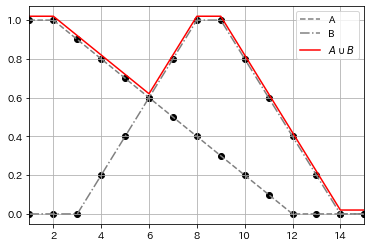

name : A OR B
['1.0/1', '1.0/2', '0.9/3', '0.8/4', '0.7/5', '0.6/6', '0.8/7', '1.0/8', '1.0/9', '0.8/10', '0.6/11', '0.4/12', '0.2/13', '0.0/14', '0.0/15']


In [96]:
fuzzy_Z= fuzzy_A+fuzzy_B

plt.figure(facecolor="white")
plot(fuzzy_A,"dashed")
plot(fuzzy_B,"dashdot")
plot((fuzzy_Z.grade)+0.02,"$A \cup B$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z.origin,len(fuzzy_Z))
plt.show()

fuzzy_Z.print_fuzzy()

## 問題2

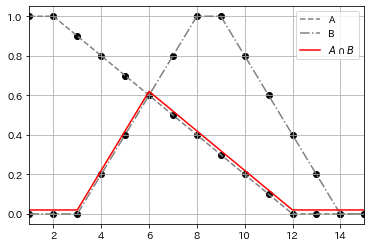

name : A AND B
['0.0/1', '0.0/2', '0.0/3', '0.2/4', '0.4/5', '0.6/6', '0.5/7', '0.4/8', '0.3/9', '0.2/10', '0.1/11', '0.0/12', '0.0/13', '0.0/14', '0.0/15']


In [97]:
fuzzy_Z= fuzzy_A*fuzzy_B

plt.figure(facecolor="white")
plot(fuzzy_A,"dashed")
plot(fuzzy_B,"dashdot")
plot((fuzzy_Z.grade)+0.02,"$A \cap B$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z.origin,len(fuzzy_Z))
plt.show()

fuzzy_Z.print_fuzzy()

## 問題3

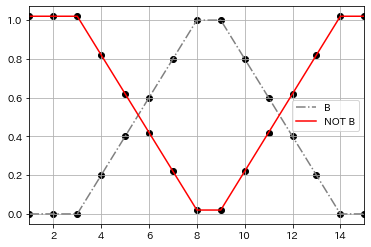

name : NOT B
['1.0/1', '1.0/2', '1.0/3', '0.8/4', '0.6/5', '0.4/6', '0.19999999999999996/7', '0.0/8', '0.0/9', '0.19999999999999996/10', '0.4/11', '0.6/12', '0.8/13', '1.0/14', '1.0/15']


In [98]:
fuzzy_Z= ~fuzzy_B

plt.figure(facecolor="white")
plot(fuzzy_B,"dashdot")
plot((fuzzy_Z.grade)+0.02,fuzzy_Z.name,"solid","red",True)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z.origin,len(fuzzy_Z))
plt.show()

fuzzy_Z.print_fuzzy()

## 問題4

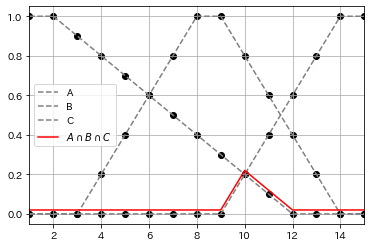

name : A AND B AND C
['0.0/1', '0.0/2', '0.0/3', '0.0/4', '0.0/5', '0.0/6', '0.0/7', '0.0/8', '0.0/9', '0.2/10', '0.1/11', '0.0/12', '0.0/13', '0.0/14', '0.0/15']


In [99]:
fuzzy_Z= fuzzy_A*fuzzy_B*fuzzy_C

plt.figure(facecolor="white")
plot(fuzzy_A,"dashed")
plot(fuzzy_B,"dashed")
plot(fuzzy_C,"dashed")
plot((fuzzy_Z.grade)+0.02,"$A \cap B \cap C$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z.origin,len(fuzzy_Z))
plt.show()

fuzzy_Z.print_fuzzy()

## 問題5

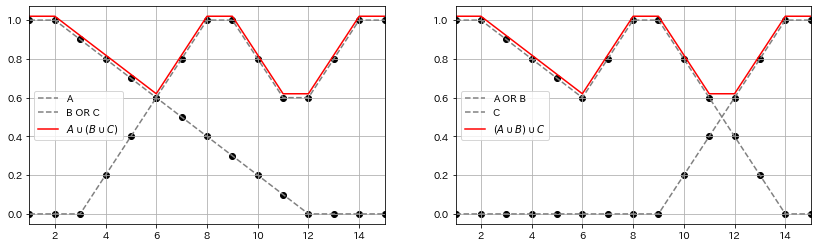

name : A OR B OR C
['1.0/1', '1.0/2', '0.9/3', '0.8/4', '0.7/5', '0.6/6', '0.8/7', '1.0/8', '1.0/9', '0.8/10', '0.6/11', '0.6/12', '0.8/13', '1.0/14', '1.0/15']
name : A OR B OR C
['1.0/1', '1.0/2', '0.9/3', '0.8/4', '0.7/5', '0.6/6', '0.8/7', '1.0/8', '1.0/9', '0.8/10', '0.6/11', '0.6/12', '0.8/13', '1.0/14', '1.0/15']


In [100]:
fuzzy_Z1= fuzzy_A+(fuzzy_B+fuzzy_C)
fuzzy_Z2= (fuzzy_A+fuzzy_B)+fuzzy_C

plt.figure(facecolor="white",figsize=(14,4))
plt.subplot(1,2,1)
plot(fuzzy_A,"dashed")
plot(fuzzy_B+fuzzy_C,"dashed")
plot((fuzzy_Z1.grade)+0.02,"$A \cup (B \cup C)$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z1.origin,len(fuzzy_Z1))

plt.subplot(1,2,2)
plot(fuzzy_A+fuzzy_B,"dashed")
plot(fuzzy_C,"dashed")
plot((fuzzy_Z2.grade)+0.02,"$(A \cup B) \cup C$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z2.origin,len(fuzzy_Z2))
plt.show()

fuzzy_Z1.print_fuzzy()
fuzzy_Z2.print_fuzzy()

## 問題6

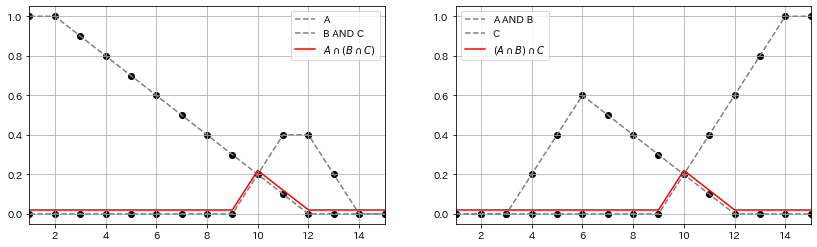

name : A AND B AND C
['0.0/1', '0.0/2', '0.0/3', '0.0/4', '0.0/5', '0.0/6', '0.0/7', '0.0/8', '0.0/9', '0.2/10', '0.1/11', '0.0/12', '0.0/13', '0.0/14', '0.0/15']
name : A AND B AND C
['0.0/1', '0.0/2', '0.0/3', '0.0/4', '0.0/5', '0.0/6', '0.0/7', '0.0/8', '0.0/9', '0.2/10', '0.1/11', '0.0/12', '0.0/13', '0.0/14', '0.0/15']


In [101]:
fuzzy_Z1= fuzzy_A*(fuzzy_B*fuzzy_C)
fuzzy_Z2= (fuzzy_A*fuzzy_B)*fuzzy_C

plt.figure(facecolor="white",figsize=(14,4))
plt.subplot(1,2,1)
plot(fuzzy_A,"dashed")
plot(fuzzy_B*fuzzy_C,"dashed")
plot((fuzzy_Z1.grade)+0.02,"$A \cap (B \cap C)$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z1.origin,len(fuzzy_Z1))

plt.subplot(1,2,2)
plot(fuzzy_A*fuzzy_B,"dashed")
plot(fuzzy_C,"dashed")
plot((fuzzy_Z2.grade)+0.02,"$(A \cap B) \cap C$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z2.origin,len(fuzzy_Z2))
plt.show()

fuzzy_Z1.print_fuzzy()
fuzzy_Z2.print_fuzzy()

## 問題7

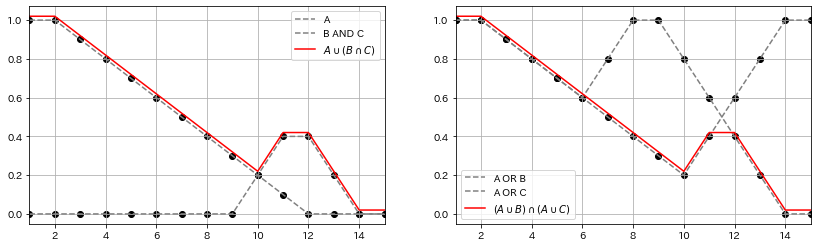

name : A OR B AND C
['1.0/1', '1.0/2', '0.9/3', '0.8/4', '0.7/5', '0.6/6', '0.5/7', '0.4/8', '0.3/9', '0.2/10', '0.4/11', '0.4/12', '0.2/13', '0.0/14', '0.0/15']
name : A OR B AND A OR C
['1.0/1', '1.0/2', '0.9/3', '0.8/4', '0.7/5', '0.6/6', '0.5/7', '0.4/8', '0.3/9', '0.2/10', '0.4/11', '0.4/12', '0.2/13', '0.0/14', '0.0/15']


In [102]:
fuzzy_Z1= fuzzy_A+(fuzzy_B*fuzzy_C)
fuzzy_Z2= (fuzzy_A+fuzzy_B)*(fuzzy_A+fuzzy_C)

plt.figure(facecolor="white",figsize=(14,4))
plt.subplot(1,2,1)
plot(fuzzy_A,"dashed")
plot(fuzzy_B*fuzzy_C,"dashed")
plot((fuzzy_Z1.grade)+0.02,"$A \cup (B \cap C)$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z1.origin,len(fuzzy_Z1))

plt.subplot(1,2,2)
plot(fuzzy_A+fuzzy_B,"dashed")
plot(fuzzy_A+fuzzy_C,"dashed")
plot((fuzzy_Z2.grade)+0.02,"$(A \cup B) \cap (A \cup C)$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z2.origin,len(fuzzy_Z2))
plt.show()

fuzzy_Z1.print_fuzzy()
fuzzy_Z2.print_fuzzy()

## 問題8

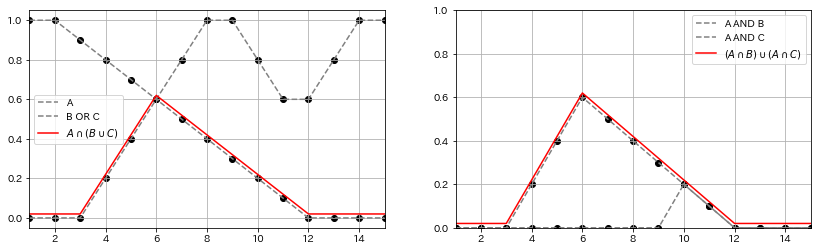

name : A AND B OR C
['0.0/1', '0.0/2', '0.0/3', '0.2/4', '0.4/5', '0.6/6', '0.5/7', '0.4/8', '0.3/9', '0.2/10', '0.1/11', '0.0/12', '0.0/13', '0.0/14', '0.0/15']
name : A AND B OR A AND C
['0.0/1', '0.0/2', '0.0/3', '0.2/4', '0.4/5', '0.6/6', '0.5/7', '0.4/8', '0.3/9', '0.2/10', '0.1/11', '0.0/12', '0.0/13', '0.0/14', '0.0/15']


In [103]:
fuzzy_Z1= fuzzy_A*(fuzzy_B+fuzzy_C)
fuzzy_Z2= (fuzzy_A*fuzzy_B)+(fuzzy_A*fuzzy_C)

plt.figure(facecolor="white",figsize=(14,4))
plt.subplot(1,2,1)
plot(fuzzy_A,"dashed")
plot(fuzzy_B+fuzzy_C,"dashed")
plot((fuzzy_Z1.grade)+0.02,"$A \cap (B \cup C)$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z1.origin,len(fuzzy_Z1))

plt.subplot(1,2,2)
plot(fuzzy_A*fuzzy_B,"dashed")
plot(fuzzy_A*fuzzy_C,"dashed")
plot((fuzzy_Z2.grade)+0.02,"$(A \cap B) \cup (A \cap C)$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z2.origin,len(fuzzy_Z2))
plt.ylim(0,1)
plt.show()

fuzzy_Z1.print_fuzzy()
fuzzy_Z2.print_fuzzy()

## 問題9

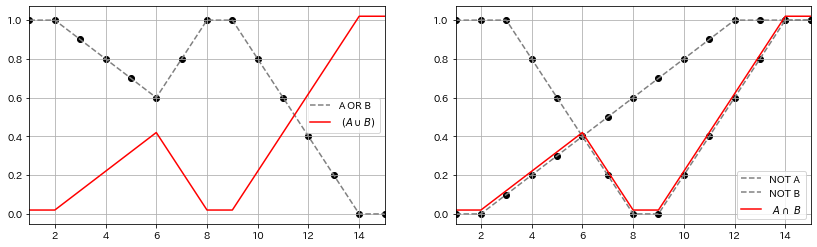

name : NOT A OR B
['0.0/1', '0.0/2', '0.09999999999999998/3', '0.19999999999999996/4', '0.30000000000000004/5', '0.4/6', '0.19999999999999996/7', '0.0/8', '0.0/9', '0.19999999999999996/10', '0.4/11', '0.6/12', '0.8/13', '1.0/14', '1.0/15']
name : NOT A AND NOT B
['0.0/1', '0.0/2', '0.09999999999999998/3', '0.19999999999999996/4', '0.30000000000000004/5', '0.4/6', '0.19999999999999996/7', '0.0/8', '0.0/9', '0.19999999999999996/10', '0.4/11', '0.6/12', '0.8/13', '1.0/14', '1.0/15']


In [104]:
fuzzy_Z1= ~(fuzzy_A+fuzzy_B)
fuzzy_Z2= ~fuzzy_A*~fuzzy_B

plt.figure(facecolor="white",figsize=(14,4))
plt.subplot(1,2,1)
plot(fuzzy_A+fuzzy_B,"dashed")
plot((fuzzy_Z1.grade)+0.02,"$~(A \cup B)$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z1.origin,len(fuzzy_Z1))

plt.subplot(1,2,2)
plot(~fuzzy_A,"dashed")
plot(~fuzzy_B,"dashed")
plot((fuzzy_Z2.grade)+0.02,"$~A \cap ~B$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z2.origin,len(fuzzy_Z2))
plt.show()

fuzzy_Z1.print_fuzzy()
fuzzy_Z2.print_fuzzy()

## 問題10

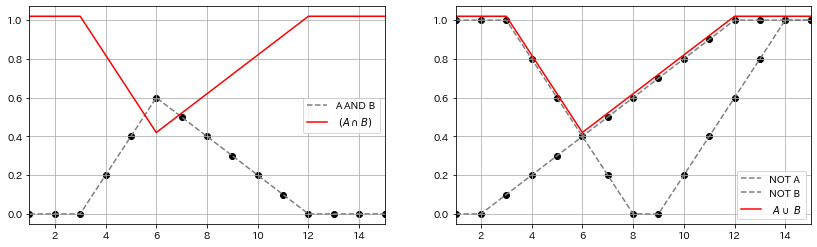

name : NOT A AND B
['1.0/1', '1.0/2', '1.0/3', '0.8/4', '0.6/5', '0.4/6', '0.5/7', '0.6/8', '0.7/9', '0.8/10', '0.9/11', '1.0/12', '1.0/13', '1.0/14', '1.0/15']
name : NOT A OR NOT B
['1.0/1', '1.0/2', '1.0/3', '0.8/4', '0.6/5', '0.4/6', '0.5/7', '0.6/8', '0.7/9', '0.8/10', '0.9/11', '1.0/12', '1.0/13', '1.0/14', '1.0/15']


In [105]:
fuzzy_Z1= ~(fuzzy_A*fuzzy_B)
fuzzy_Z2= ~fuzzy_A+~fuzzy_B

plt.figure(facecolor="white",figsize=(14,4))
plt.subplot(1,2,1)
plot(fuzzy_A*fuzzy_B,"dashed")
plot((fuzzy_Z1.grade)+0.02,"$~(A \cap B)$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z1.origin,len(fuzzy_Z1))

plt.subplot(1,2,2)
plot(~fuzzy_A,"dashed")
plot(~fuzzy_B,"dashed")
plot((fuzzy_Z2.grade)+0.02,"$~A \cup ~B$","solid","red",False)
plt.legend()
plt.grid()
plt.xlim(fuzzy_Z2.origin,len(fuzzy_Z2))
plt.show()

fuzzy_Z1.print_fuzzy()
fuzzy_Z2.print_fuzzy()